# Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import seaborn as sns
import folium

# For geocoding
from geopy.geocoders import Nominatim

import requests
from requests import get

# Import Data

In [370]:
endpoint = ('https://connecteddata.nationalgrid.co.uk/api/3/action/datastore_search?resource_id=91c970d7-3c03-4786-a19e-08967036c7bd')

parameters = {
    # 'filters' : '{"Licence Area" : "South West"}',
    'q': '{"Bulk Supply Point Name" : "Bath"}',
    'limit' : 32000,
}

response = get(endpoint, params = parameters)
json_data = response.json()

In [168]:
len(json_data['result']['records'])

230

230 is way too low. The actual number of distribution substations in Bath should be around 660. I don't know why this is happening with the data retrieved via the API.

In [66]:
json_data['result']['records'][0]

{'_id': 1,
 'index': 0,
 'Licence Area': 'South West',
 'Grid Supply Point Number': 306004,
 'Grid Supply Point Name': 'Abham  S.G.P.',
 'Bulk Supply Point Number': 330003,
 'Bulk Supply Point Name': 'Plymouth Bsp',
 'Primary Name': 'Eggbuckland',
 'Primary Number': 330025,
 'HV Feeder': '330025/0021',
 'Substation Type': 'Grd Mtd ',
 'Substation Name': 'Bearsdown Road',
 'Substation Number': 331675,
 'Grid Reference': 'SX501680575390',
 'LONGITUDE': -4.109596,
 'LATITUDE': 50.398507,
 'Day Max Demand': 177,
 'Night Max Demand': 74,
 'Substation Rating': 500,
 'LCT Count Total': 2,
 'Energy Storage': 1,
 'Heat Pumps': 0,
 'EV Chargers': 1,
 'Total LCT Capacity': 35.5,
 'Total Generation Capacity': 50.98,
 'Solar': 14,
 'Wind': 0,
 'Bio Fuels': 0,
 'Water Generation': 0,
 'Waste Generation': 0,
 'Storage Generation': 0,
 'Fossil Fuels': 0,
 'Other Generation': 0,
 'Customers': 122,
 'Longitude': '',
 'Latitude': ''}

In [70]:
df = pd.json_normalize(json_data['result']['records'])
df.head()

_id  index Licence Area  Grid Supply Point Number Grid Supply Point Name  \
0    1      0   South West                    306004          Abham  S.G.P.   
1    2      1   South West                    306004          Abham  S.G.P.   
2    3      2   South West                    406003       Landulph  S.G.P.   
3    4      3   South West                    306004          Abham  S.G.P.   
4    5      4   South West                    406003       Landulph  S.G.P.   

   Bulk Supply Point Number Bulk Supply Point Name     Primary Name  \
0                    330003           Plymouth Bsp      Eggbuckland   
1                    330003           Plymouth Bsp  Plymstock South   
2                    457510         St Germans Bsp    Torpoint Town   
3                    330003           Plymouth Bsp  Plymstock South   
4                    330001         Ernesettle Bsp        Merrivale   

   Primary Number    HV Feeder  ... Wind Bio Fuels  Water Generation  \
0          330025  330025/0021  ...    0         0                 0   
1          330037  330037/0018  ...    0         0                 0   
2          457530  457530/0043  ...    0         0                 0   
3          330037  330037/0017  ...    0         0                 0   
4          330017  330017/0018  ...    0         0                 0   

  Waste Generation  Storage Generation  Fossil Fuels  Other Generation  \
0                0                   0             0                 0   
1                0                   0             0                 0   
2                0                   0             0                 0   
3                0                   0             0                 0   
4                0                   0             0                 0   

   Customers  Longitude  Latitude  
0        122                       
1        111                       
2        101                       
3         59                       
4        144                       

[5 rows x 36 columns]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        11042 non-null  int64  
 1   index                      11042 non-null  int64  
 2   Licence Area               11042 non-null  object 
 3   Grid Supply Point Number   11042 non-null  int64  
 4   Grid Supply Point Name     11042 non-null  object 
 5   Bulk Supply Point Number   11042 non-null  int64  
 6   Bulk Supply Point Name     11042 non-null  object 
 7   Primary Name               11042 non-null  object 
 8   Primary Number             11042 non-null  int64  
 9   HV Feeder                  11042 non-null  object 
 10  Substation Type            11042 non-null  object 
 11  Substation Name            11042 non-null  object 
 12  Substation Number          11042 non-null  int64  
 13  Grid Reference             11042 non-null  obj

# Import Distribution Substation data from CSV

In [336]:
ds = pd.read_csv('../../data/network_data/distribution_substations.csv')
ds.head()

/var/folders/3p/gfh9bx_x6g538359fqt4lgtm0000gn/T/ipykernel_84952/3297352422.py:1: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('../../data/network_data/distribution_substations.csv')


index License Area  Grid Supply Point Number Grid Supply Point Name  \
0      0   South West                    306004          Abham  S.G.P.   
1      1   South West                    306004          Abham  S.G.P.   
2      2   South West                    306004          Abham  S.G.P.   
3      4   South West                    306004          Abham  S.G.P.   
4      5   South West                    406003       Landulph  S.G.P.   

   Bulk Supply Point Number Bulk Supply Point Name     Primary Name  \
0                    330006           Plympton Bsp    Linketty Lane   
1                    330003           Plymouth Bsp  Plymstock South   
2                    330003           Plymouth Bsp  Plymstock South   
3                    330006           Plympton Bsp    Linketty Lane   
4                    330001         Ernesettle Bsp         Southway   

   Primary Number    HV Feeder Substation Type  ... Total Generation Capacity  \
0          330029  330029/0016        Grd Mtd   ...                     14.26   
1          330037  330037/0017        Grd Mtd   ...                      7.45   
2          330037  330037/0018        Grd Mtd   ...                     24.41   
3          330029  330029/0016        Grd Mtd   ...                    236.04   
4          330023  330023/0046        Grd Mtd   ...                      47.5   

   Solar Wind  Bio Fuels  Water Generation  Waste Generation  \
0      4    0          0                 0                 0   
1      2    0          0                 0                 0   
2      7    0          0                 0                 0   
3     75    0          0                 0                 0   
4      2    0          0                 0                 0   

   Storage Generation  Fossil Fuels  Other Generation Customers  
0                   0             0                 0       115  
1                   0             0                 0        59  
2                   0             0                 0       149  
3                   0             0                 0       178  
4                   0             0                 0        27  

[5 rows x 34 columns]

In [337]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186011 entries, 0 to 186010
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      186011 non-null  int64  
 1   License Area               186011 non-null  object 
 2   Grid Supply Point Number   186011 non-null  int64  
 3   Grid Supply Point Name     186011 non-null  object 
 4   Bulk Supply Point Number   186011 non-null  int64  
 5   Bulk Supply Point Name     186011 non-null  object 
 6   Primary Name               186011 non-null  object 
 7   Primary Number             186011 non-null  int64  
 8   HV Feeder                  184938 non-null  object 
 9   Substation Type            184938 non-null  object 
 10  Substation Name            186011 non-null  object 
 11  Substation Number          184938 non-null  float64
 12  Grid Reference             184938 non-null  object 
 13  LONGITUDE                  18

In [338]:
ds = ds.replace('Hidden', np.nan)

In [340]:
ds['EV Chargers'] = ds['EV Chargers'].astype('float64')
ds['Heat Pumps'] = ds['Heat Pumps'].astype('float64')
ds['Customers'] = ds['Customers'].astype('float64')

In [341]:
ds[ds['Bulk Supply Point Name'].str.contains('Bath', regex=False)]['Primary Name'].value_counts()

Batheaston             175
Entry Hill             124
Dorchester St - New    122
Combe Park              84
Twerton                 60
Oldfield Park           53
Park Street             45
Name: Primary Name, dtype: int64

# Load Distribution Substation Shapefiles

In [357]:
file = '../../data/network_data/dist_swest_march2023.gpkg'
ds_geo = gpd.read_file(file)
# ds_geo = ds_geo.set_index('NR', drop=False) # Set index to the distribution substation number (NR)
ds_geo.head()

NRID      NR  NR_TYPE_ID           NAME  PRIM_NRID PRIM_NRID_NAME  \
0  48064  182064          19  Norville Lane      15094        Cheddar   
1  48064  182064          19  Norville Lane      15094        Cheddar   
2  48064  182064          19  Norville Lane      15094        Cheddar   
3  45824  180819          19    Wideatts Rd      15094        Cheddar   
4  47236  181591          19   Barrows Park      15094        Cheddar   

   BSP_NRID        BSP_NRID_NAME  GSP_NRID       GSP_NRID_NAME  \
0        85  Churchill Bsp 132kv       135  Bridgwater  S.G.P.   
1        85  Churchill Bsp 132kv       135  Bridgwater  S.G.P.   
2        85  Churchill Bsp 132kv       135  Bridgwater  S.G.P.   
3        85  Churchill Bsp 132kv       135  Bridgwater  S.G.P.   
4        85  Churchill Bsp 132kv       135  Bridgwater  S.G.P.   

                                            geometry  
0  MULTIPOLYGON (((345680.766 153442.467, 345687....  
1  MULTIPOLYGON (((345851.254 153358.728, 345838....  
2  MULTIPOLYGON (((345866.521 153634.380, 345876....  
3  MULTIPOLYGON (((345111.495 153410.786, 345106....  
4  MULTIPOLYGON (((345315.659 153581.623, 345314....

In [358]:
ds_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60512 entries, 0 to 60511
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NRID            60512 non-null  int64   
 1   NR              60512 non-null  object  
 2   NR_TYPE_ID      60512 non-null  int64   
 3   NAME            58199 non-null  object  
 4   PRIM_NRID       60512 non-null  int64   
 5   PRIM_NRID_NAME  60445 non-null  object  
 6   BSP_NRID        60512 non-null  int64   
 7   BSP_NRID_NAME   60510 non-null  object  
 8   GSP_NRID        60512 non-null  int64   
 9   GSP_NRID_NAME   60510 non-null  object  
 10  geometry        60512 non-null  geometry
dtypes: geometry(1), int64(5), object(5)
memory usage: 5.1+ MB


In [359]:
ds_geo = ds_geo.rename(columns={'NR':'Substation Number'})

## Dissolve duplate columns (with different geometries)

In [360]:
ds_geo = ds_geo.dissolve('Substation Number').reset_index()

In [361]:
ds_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53531 entries, 0 to 53530
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Substation Number  53531 non-null  object  
 1   geometry           53531 non-null  geometry
 2   NRID               53531 non-null  int64   
 3   NR_TYPE_ID         53531 non-null  int64   
 4   NAME               51365 non-null  object  
 5   PRIM_NRID          53531 non-null  int64   
 6   PRIM_NRID_NAME     53465 non-null  object  
 7   BSP_NRID           53531 non-null  int64   
 8   BSP_NRID_NAME      53529 non-null  object  
 9   GSP_NRID           53531 non-null  int64   
 10  GSP_NRID_NAME      53529 non-null  object  
dtypes: geometry(1), int64(5), object(5)
memory usage: 4.5+ MB


<Axes: >

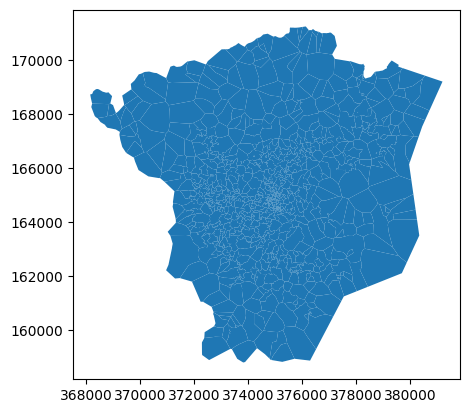

In [354]:
ds_geo[ds_geo.GSP_NRID == 131].plot()

# Merge Datasets

In [364]:
ds_combined = pd.merge(ds_geo, ds, how='left', on ='Substation Number')
ds_combined.head()

Substation Number                                           geometry   NRID  \
0            110001  MULTIPOLYGON (((359415.517 174908.040, 359409....  33447   
1            110002  MULTIPOLYGON (((359114.040 174783.416, 359096....  33449   
2            110003  POLYGON ((359010.628 175188.146, 359011.850 17...  33451   
3            110003  POLYGON ((359010.628 175188.146, 359011.850 17...  33451   
4            110004  MULTIPOLYGON (((359191.503 175402.490, 359193....  33453   

   NR_TYPE_ID                NAME  PRIM_NRID     PRIM_NRID_NAME  BSP_NRID  \
0          19  Chesterfield Rd Id      15039  St Pauls Bsp 11kv       104   
1          19   Effingham Road Id      15039  St Pauls Bsp 11kv       104   
2          19       Somerville Rd      15039  St Pauls Bsp 11kv       104   
3          19       Somerville Rd      15039  St Pauls Bsp 11kv       104   
4          19         Kent Road P      15039  St Pauls Bsp 11kv       104   

        BSP_NRID_NAME  GSP_NRID  ... Total Generation Capacity  Solar Wind  \
0  St Pauls Bsp 132kv       130  ...                     29.22     11    0   
1  St Pauls Bsp 132kv       130  ...                     16.99      7    0   
2  St Pauls Bsp 132kv       130  ...                    54.535     15    0   
3  St Pauls Bsp 132kv       130  ...                       NaN    NaN  NaN   
4  St Pauls Bsp 132kv       130  ...                    26.115     10    0   

   Bio Fuels Water Generation  Waste Generation Storage Generation  \
0          0                0                 0                  0   
1          0                0                 0                  0   
2          0                0                 0                  1   
3        NaN              NaN               NaN                NaN   
4          0                0                 0                  0   

  Fossil Fuels  Other Generation Customers  
0            0                 0     367.0  
1            0                 0     331.0  
2            0                 0     254.0  
3          NaN               NaN       NaN  
4            0                 0     276.0  

[5 rows x 44 columns]

In [365]:
ds_combined = ds_combined.rename(columns={'Substation Name':'Name'})
ds_combined.loc[ds_combined['Name'].isna(), 'Name'] = 'Name Unknown' # For the "key_on" part of the choropleth map

In [366]:
bath_ds_combined = ds_combined[ds_combined['GSP_NRID'] == 131]
bath_ds_combined.head()

Substation Number                                           geometry  \
798             111229  POLYGON ((368159.983 168719.998, 368169.060 16...   
799             111230  POLYGON ((368420.060 167844.820, 368370.921 16...   
824             111259  POLYGON ((369337.334 167913.995, 369276.539 16...   
827             111263  POLYGON ((368927.158 167459.977, 368797.384 16...   
3327            160001  POLYGON ((372337.346 165252.671, 372327.017 16...   

       NRID  NR_TYPE_ID              NAME  PRIM_NRID PRIM_NRID_NAME  BSP_NRID  \
798   35200          18         Avon Farm      15080     Combe Park        94   
799   35202          18      Avon Cottage      15080     Combe Park        94   
824   35254          18      Jolly Sailor      15080     Combe Park        94   
827   35260          18         Mead Lane      15080     Combe Park        94   
3327  39252          19  Apsley Road Rmua      15066        Twerton        94   

             BSP_NRID_NAME  GSP_NRID  ... Total Generation Capacity  Solar  \
798   Bath (Dolemeads) 132       131  ...                       NaN    NaN   
799   Bath (Dolemeads) 132       131  ...                       NaN    NaN   
824   Bath (Dolemeads) 132       131  ...                      2.62      1   
827   Bath (Dolemeads) 132       131  ...                       3.0      1   
3327  Bath (Dolemeads) 132       131  ...                     19.64      5   

     Wind  Bio Fuels Water Generation  Waste Generation Storage Generation  \
798   NaN        NaN              NaN               NaN                NaN   
799   NaN        NaN              NaN               NaN                NaN   
824     0          0                0                 0                  0   
827     0          0                0                 0                  0   
3327    0          0                0                 0                  0   

     Fossil Fuels  Other Generation Customers  
798           NaN               NaN       NaN  
799           NaN               NaN       NaN  
824             0                 0      15.0  
827             0                 0      16.0  
3327            0                 0     133.0  

[5 rows x 44 columns]

In [367]:
bath_ds_combined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 669 entries, 798 to 5946
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Substation Number          669 non-null    object  
 1   geometry                   669 non-null    geometry
 2   NRID                       669 non-null    int64   
 3   NR_TYPE_ID                 669 non-null    int64   
 4   NAME                       642 non-null    object  
 5   PRIM_NRID                  669 non-null    int64   
 6   PRIM_NRID_NAME             669 non-null    object  
 7   BSP_NRID                   669 non-null    int64   
 8   BSP_NRID_NAME              669 non-null    object  
 9   GSP_NRID                   669 non-null    int64   
 10  GSP_NRID_NAME              669 non-null    object  
 11  index                      645 non-null    float64 
 12  License Area               645 non-null    object  
 13  Grid Supply Point Number

In [319]:
bath_ds_combined.columns

Index(['Substation Number', 'geometry', 'NRID', 'NR_TYPE_ID', 'NAME',
       'PRIM_NRID', 'PRIM_NRID_NAME', 'BSP_NRID', 'BSP_NRID_NAME', 'GSP_NRID',
       'GSP_NRID_NAME', 'index', 'License Area', 'Grid Supply Point Number',
       'Grid Supply Point Name', 'Bulk Supply Point Number',
       'Bulk Supply Point Name', 'Primary Name', 'Primary Number', 'HV Feeder',
       'Substation Type', 'Name', 'Grid Reference', 'LONGITUDE', 'LATITUDE',
       'Day Max Demand', 'Night Max Demand', 'Substation Rating',
       'Transformer Headroom', 'LCT Count Total', 'Energy Storage',
       'Heat Pumps', 'EV Chargers', 'Total LCT Capacity',
       'Total Generation Capacity', 'Solar', 'Wind', 'Bio Fuels',
       'Water Generation', 'Waste Generation', 'Storage Generation',
       'Fossil Fuels', 'Other Generation', 'Customers'],
      dtype='object')

# Plot on map

In [241]:
address = "BA1 1LZ" # Chosen as a central location of Bath city

geolocator = Nominatim(user_agent="iyzf20@bath.ac.uk") # Using the Nominatim geolocator from OpenStreetMap

location = geolocator.geocode(address)

loc_lat = location.point.latitude
loc_lon = location.point.longitude

print("Latitude:", loc_lat)
print("Longitude:", loc_lon)

Latitude: 51.38100816666667
Longitude: -2.359801216666667


## Number of Customers

In [368]:
m1 = folium.Map(location=[loc_lat, loc_lon], tiles='openstreetmap', zoom_start=13)

cp = folium.Choropleth(geo_data = bath_ds_combined,
                       data = bath_ds_combined,
                       columns = ['Name', 'Customers'],
                       key_on = 'feature.properties.Name',
                       fill_color = "Blues",
                       fill_opacity = 0.7,
                       nan_fill_opacity = 0.5,
                       highlight=True).add_to(m1)
folium.GeoJsonTooltip(['Substation Number', 'Name', 'EV Chargers', 'Heat Pumps', 'Customers', 'Substation Rating', 'Day Max Demand']).add_to(cp.geojson)
folium.LayerControl().add_to(m1)
m1

## EV Charger Installations

In [369]:
m2 = folium.Map(location=[loc_lat, loc_lon], tiles='openstreetmap', zoom_start=13)

cp = folium.Choropleth(geo_data = bath_ds_combined,
                       data = bath_ds_combined,
                       columns = ['Name', 'EV Chargers'],
                       key_on = 'feature.properties.Name',
                       fill_color = "Blues",
                       fill_opacity = 0.7,
                       nan_fill_opacity = 0.5,
                       highlight=True).add_to(m2)
folium.GeoJsonTooltip(['Substation Number', 'Name', 'EV Chargers', 'Heat Pumps', 'Customers', 'Substation Rating', 'Day Max Demand']).add_to(cp.geojson)
folium.LayerControl().add_to(m2)
m2